In [1]:
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt


In [10]:
data = pd.read_csv('/content/drive/Shareddrives/RFID_23-24/3.1 Final Setup/dataset/condensed_data_all.csv')
data.head()

,A1_sd,A1_mean,A2_sd,A2_mean,A3_sd,A3_mean,A4_sd,A4_mean,x,y
0,1.224650,-60.473337,0.829594,-64.959278,0.985218,-61.635577,0.938979,-64.718678,7,8
1,1.293700,-64.089406,0.967864,-57.929804,0.500912,-53.741022,0.496124,-55.773512,6,2
2,2.760060,-62.622321,2.713263,-61.967645,1.257812,-63.217529,0.488384,-57.486850,10,6
3,1.220471,-60.789345,1.119790,-59.706204,0.873253,-61.671806,1.294562,-63.006389,5,9
4,1.405208,-63.094378,1.052808,-64.719266,1.599324,-65.345833,1.133481,-64.602015,10,10


In [33]:
predict = ['x','y']
X = np.array(data.drop(predict, axis=1))
y = np.array(data[predict])
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [34]:
error = []

#Calculating MAE error for K values between 1 and 39
for i in range(1, 40):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    mae = mean_absolute_error(y_test, pred_i)
    error.append(mae)

errorWithWeight = []

for i in range(1, 40):
  knn_weight = KNeighborsRegressor(n_neighbors=i,weights='distance')
  knn_weight.fit(x_train, y_train)
  pred_i = knn_weight.predict(x_test)
  mae_weight = mean_absolute_error(y_test, pred_i)
  errorWithWeight.append(mae_weight)

errorWith_W_A = []

for i in range(1, 40):
  knn_wA = KNeighborsRegressor(n_neighbors=i,weights='distance',algorithm='kd_tree')
  knn_wA.fit(x_train, y_train)
  pred_i = knn_wA.predict(x_test)
  mae_wA = mean_absolute_error(y_test, pred_i)
  errorWith_W_A.append(mae_wA)


print (error)
print (errorWithWeight)
print (errorWith_W_A)

[1.4464285714285714, 1.4910714285714286, 1.5654761904761905, 1.53125, 1.5357142857142856, 1.5446428571428572, 1.5076530612244898, 1.40625, 1.4365079365079367, 1.4803571428571427, 1.5194805194805194, 1.494047619047619, 1.51510989010989, 1.4834183673469385, 1.4904761904761903, 1.4988839285714284, 1.5441176470588238, 1.5456349206349205, 1.5469924812030076, 1.5696428571428567, 1.576530612244898, 1.5803571428571432, 1.6110248447204971, 1.604166666666667, 1.62, 1.5947802197802199, 1.617724867724868, 1.6332908163265305, 1.6293103448275863, 1.625, 1.629608294930876, 1.6456473214285714, 1.6650432900432899, 1.6633403361344534, 1.6668367346938777, 1.6607142857142856, 1.6660231660231664, 1.6790413533834587, 1.6781135531135534]
[1.4464285714285714, 1.463265473642263, 1.530782714063116, 1.4780704312569823, 1.4760888908672452, 1.4761182001814823, 1.4540901605923495, 1.3604406268455826, 1.3676441412542537, 1.4108830872318125, 1.4309827242018938, 1.417939611350704, 1.437093709540041, 1.4168603079520006

Text(0, 0.5, 'Mean Absolute Error')

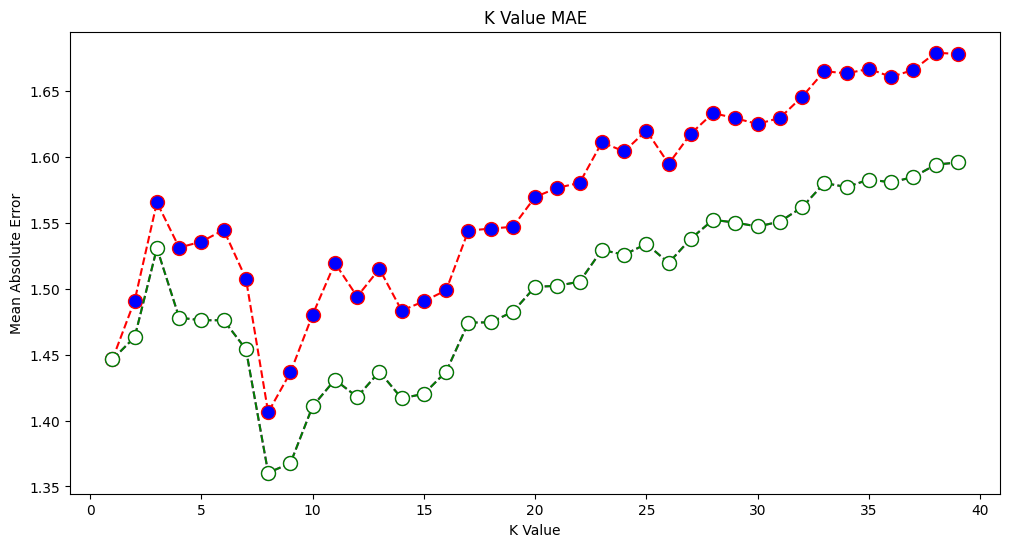

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red',
         linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)

plt.plot(range(1, 40), errorWithWeight, color='m',
         linestyle='dashed', marker='o',
         markerfacecolor='y', markersize=10)

plt.plot(range(1, 40), errorWith_W_A, color='g',
         linestyle='dashed', marker='o',
         markerfacecolor='w', markersize=10)


plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Mean Absolute Error')

# print (error)


In [46]:
from numpy import mean, std, absolute
from sklearn.model_selection import RepeatedKFold, cross_val_score, train_test_split
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Define the model
model_k = KNeighborsRegressor(n_neighbors=1, weights='distance',algorithm='kd_tree')

# Fit the model
model_k.fit(x_train, y_train)

# Make predictions on the test set
predictions = model_k.predict(x_test)

# Evaluate R squared on training set
y_train_pred = model_k.predict(x_train)
print('R squared on training set:', r2_score(y_train, y_train_pred))

# Define the evaluation procedure (Repeated K-Fold)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# Evaluate the model using cross-validation and collect the scores
n_scores = cross_val_score(model_k, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
n_scores = absolute(n_scores)  # Convert scores to positive

# Summarize performance
print('MSE with Cross-Validation: Mean=%.3f (STD=%.3f)' % (mean(n_scores), std(n_scores)))

# Calculate mean absolute error, mean squared error, and root mean squared error
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

# Print the evaluation metrics
print(f'MAE with test data: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

# Print the model accuracy on the test set
acc = model_k.score(x_test, y_test)
print(f'Accuracy on test data: {acc}')


R squared on training set: 1.0
MSE with Cross-Validation: Mean=5.777 (STD=1.640)
MAE with test data: 1.4464285714285714
MSE: 5.625
RMSE: 2.370125063218973
Accuracy on test data: 0.3556809541266963


In [47]:
over_lap = []
for i in range(len(predictions)):
    if (predictions[i][0] == y_test[i][0] and predictions[i][1] == y_test[i][1]):
        over_lap.append(predictions[i])
over_lap

[array([5., 5.]), array([9., 5.]), array([5., 5.]), array([2., 5.])]

<ipython-input-48-d7c18ada760a>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot([y_test[i][0],predictions[i][0]], [y_test[i][1],predictions[i][1]], 'ro-', markersize=0, color='grey')


Text(0.5, 1.0, 'Blue are Test data; Orange are Predictions; Green are Accurate Predictions Using KNeighborsRegressor (With min and max for each antenna)')

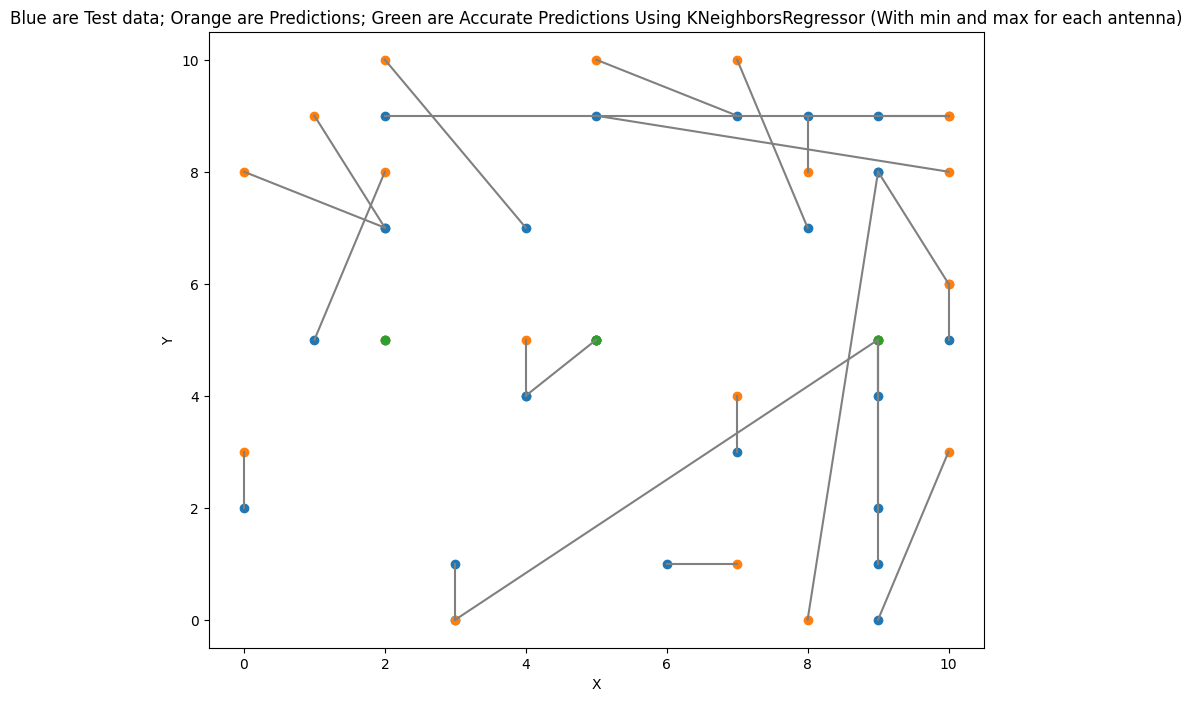

In [48]:
plt.figure(figsize=(10, 8))
plt.scatter(*zip(*y_test))
plt.scatter(*zip(*predictions))
plt.scatter(*zip(*over_lap))
for i in range(0, len(y_test)):
    # if (y_test[i][0] == predictions[i][0] and y_test[i][1] == predictions[i][1]) :
    #     plt.plot(predictions[i])
    # else:
    plt.plot([y_test[i][0],predictions[i][0]], [y_test[i][1],predictions[i][1]], 'ro-', markersize=0, color='grey')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Blue are Test data; Orange are Predictions; Green are Accurate Predictions Using KNeighborsRegressor (With min and max for each antenna)')